In [24]:
import numpy as np
import pandas as pd

import seaborn as sns
import missingno as mo
import matplotlib.pyplot as plt

% matplotlib inline

In [3]:
# Globals
SEED = 0

## Clinical parameters

In [9]:
raw_data = pd.read_excel(
    './../../data/tabular/clinical_params.xlsx', index_col=0, header=0
)
raw_data.head()

,Alder,Kjønn,ICD10 kort,T-klassifisering,N-klassifisering,Stadium,Histologi,HPV-status,ECOG,Charlson,Pakkeår,Naxogin dager,Cisplatin
Pasient-ID,,,,,,,,,,,,,
1,57.854795,M,C01,4,2,4a,1.0,2,1,0,32.141096,29.0,0
2,60.832877,M,C09,2,2,4a,0.0,2,0,0,0.000000,39.0,6
3,75.663014,M,C32,2,0,2,1.0,2,0,0,55.663014,41.0,0
4,49.906849,K,C09,2,2,4a,0.0,2,0,0,4.786027,33.0,5
5,54.238356,K,C09,2,0,2,0.0,0,0,0,0.000000,42.0,0


In [10]:
raw_data.columns

Index(['Alder', 'Kjønn', 'ICD10 kort', 'T-klassifisering', 'N-klassifisering',
       'Stadium', 'Histologi', 'HPV-status', 'ECOG', 'Charlson', 'Pakkeår',
       'Naxogin dager', 'Cisplatin'],
      dtype='object')

### Exploration

In [11]:
raw_data.dtypes

Alder               float64
Kjønn                object
ICD10 kort           object
T-klassifisering      int64
N-klassifisering      int64
Stadium              object
Histologi           float64
HPV-status            int64
ECOG                  int64
Charlson              int64
Pakkeår             float64
Naxogin dager       float64
Cisplatin             int64
dtype: object

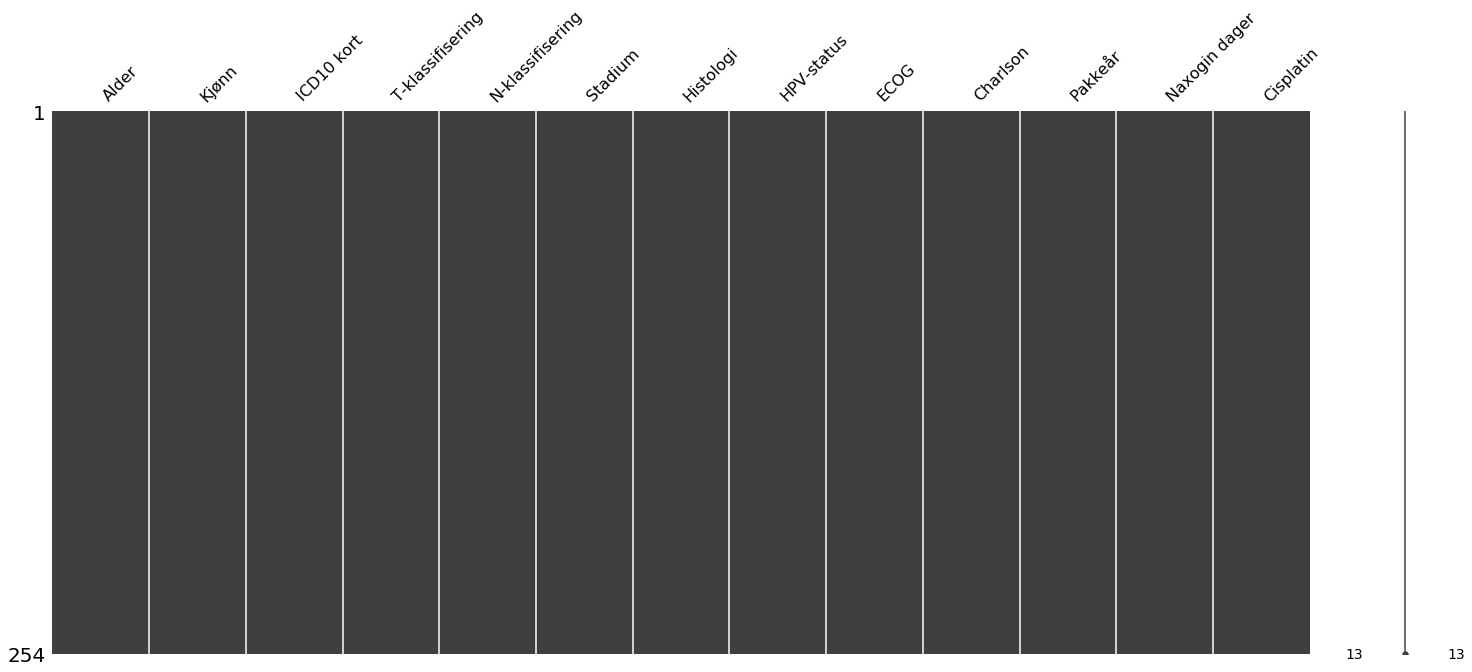

In [12]:
mo.matrix(raw_data);
#plt.set_params({'fontsize': 16})

In [13]:
# TODO: Read targets and check correlations
"""plt.figure(figsize=(8, 8))
sns.set(font_scale=2)
sns.heatmap(raw_data.corr())
plt.tight_layout()"""

'plt.figure(figsize=(8, 8))\nsns.set(font_scale=2)\nsns.heatmap(raw_data.corr())\nplt.tight_layout()'

In [7]:
"""plt.figure(figsize=(8, 8));
sns.set(font_scale=1.2);
sns.pairplot(raw_data);"""

'plt.figure(figsize=(8, 8));\nsns.set(font_scale=1.2);\nsns.pairplot(raw_data);'

### Preprocessing

In [35]:
prep_data = raw_data.copy()

In [36]:
prep_data.index.name = 'patient'
prep_data.columns = [
    'age', 'sex', 'icd10', 't_class', 'n_class', 'stage', 'histology', 'hpv', 
    'ecog', 'charlson', 'year_smoking', 'days_naxogin', 'cisplatin'
]
prep_data.head()

,age,sex,icd10,t_class,n_class,stage,histology,hpv,ecog,charlson,year_smoking,days_naxogin,cisplatin
patient,,,,,,,,,,,,,
1,57.854795,M,C01,4,2,4a,1.0,2,1,0,32.141096,29.0,0
2,60.832877,M,C09,2,2,4a,0.0,2,0,0,0.000000,39.0,6
3,75.663014,M,C32,2,0,2,1.0,2,0,0,55.663014,41.0,0
4,49.906849,K,C09,2,2,4a,0.0,2,0,0,4.786027,33.0,5
5,54.238356,K,C09,2,0,2,0.0,0,0,0,0.000000,42.0,0


In [37]:
prep_data['sex_male'] = pd.get_dummies(prep_data['sex'], drop_first=True)
prep_data.head()

,age,sex,icd10,t_class,n_class,stage,histology,hpv,ecog,charlson,year_smoking,days_naxogin,cisplatin,sex_male
patient,,,,,,,,,,,,,,
1,57.854795,M,C01,4,2,4a,1.0,2,1,0,32.141096,29.0,0,1
2,60.832877,M,C09,2,2,4a,0.0,2,0,0,0.000000,39.0,6,1
3,75.663014,M,C32,2,0,2,1.0,2,0,0,55.663014,41.0,0,1
4,49.906849,K,C09,2,2,4a,0.0,2,0,0,4.786027,33.0,5,0
5,54.238356,K,C09,2,0,2,0.0,0,0,0,0.000000,42.0,0,0


In [38]:
icd10_enc = pd.get_dummies(prep_data['icd10'], drop_first=True)
for col in icd10_enc:
    prep_data[col] = icd10_enc[col]

In [39]:
prep_data.stage.unique()

array(['4a', 2, 1, 3, '4b', '4c', 4, 0, '4a?'], dtype=object)

In [50]:
prep_data.stage.replace(['4a', '4b', '4c', '4a?'], 4, inplace=True)
stadium_enc = pd.get_dummies(prep_data.stage, drop_first=True)
for col in stadium_enc:
    prep_data['stage_{}'.format(col)] = stadium_enc[col]
prep_data.head()

,age,sex,icd10,t_class,n_class,stage,histology,hpv,ecog,charlson,...,C06,C09,C10,C12,C13,C32,stage_1,stage_2,stage_3,stage_4
patient,,,,,,,,,,,,,,,,,,,,,
1,57.854795,M,C01,4,2,4,1.0,2,1,0,...,0,0,0,0,0,0,0,0,0,1
2,60.832877,M,C09,2,2,4,0.0,2,0,0,...,0,1,0,0,0,0,0,0,0,1
3,75.663014,M,C32,2,0,2,1.0,2,0,0,...,0,0,0,0,0,1,0,1,0,0
4,49.906849,K,C09,2,2,4,0.0,2,0,0,...,0,1,0,0,0,0,0,0,0,1
5,54.238356,K,C09,2,0,2,0.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [51]:
# Dropping features
prep_data.drop(
    ['icd10', 'stage', 'sex'], axis=1, inplace=True
)

In [52]:
prep_data.head()

,age,t_class,n_class,histology,hpv,ecog,charlson,year_smoking,days_naxogin,cisplatin,...,C06,C09,C10,C12,C13,C32,stage_1,stage_2,stage_3,stage_4
patient,,,,,,,,,,,,,,,,,,,,,
1,57.854795,4,2,1.0,2,1,0,32.141096,29.0,0,...,0,0,0,0,0,0,0,0,0,1
2,60.832877,2,2,0.0,2,0,0,0.000000,39.0,6,...,0,1,0,0,0,0,0,0,0,1
3,75.663014,2,0,1.0,2,0,0,55.663014,41.0,0,...,0,0,0,0,0,1,0,1,0,0
4,49.906849,2,2,0.0,2,0,0,4.786027,33.0,5,...,0,1,0,0,0,0,0,0,0,1
5,54.238356,2,0,0.0,0,0,0,0.000000,42.0,0,...,0,1,0,0,0,0,0,1,0,0


## PET parameters

In [54]:
pet_params = pd.read_excel('./../../data/tabular/pet_params.xlsx')
pet_params.head()

,'patientID','volume','SUVmax','SUVpeak','MTV','TLG',Unnamed: 6,%EXPLANATIONS:
0,1,0.000,NaN,NaN,NaN,NaN,NaN,%volume: Volume of primary tumor [cm3](alread...
1,2,17.142,24.7412,21.616549,7.384,124.870726,NaN,%SUVmax: Maximum SUV in the primary tumor vol...
2,3,0.000,NaN,NaN,NaN,NaN,NaN,%SUVpeak: Maximum mean value of SUV in a spher...
3,4,9.661,18.6557,15.296275,3.406,41.554406,NaN,% where the center of the sphere (regi...
4,5,16.214,16.7395,14.473272,7.934,86.228420,NaN,% must belong to the tumor volume.


In [55]:
pet_params.columns

Index([''patientID'', ''volume'', ''SUVmax'', ''SUVpeak'', ''MTV'', ''TLG'',
       'Unnamed: 6', '%EXPLANATIONS:  '],
      dtype='object')

### Preprocessing

In [56]:
prep_pet_params = pet_params.copy()

In [66]:
prep_pet_params.index = prep_pet_params[prep_pet_params.columns[0]]
prep_pet_params.index.name = 'patient'
prep_pet_params.columns = [
    'X', 'volume', 'suv_max', 'suv_peak', 'mtv', 'tlg', 'Y', 'Z'
]
prep_pet_params.head()

,X,volume,suv_max,suv_peak,mtv,tlg,Y,Z
patient,,,,,,,,
1,1,0.000,NaN,NaN,NaN,NaN,NaN,%volume: Volume of primary tumor [cm3](alread...
2,2,17.142,24.7412,21.616549,7.384,124.870726,NaN,%SUVmax: Maximum SUV in the primary tumor vol...
3,3,0.000,NaN,NaN,NaN,NaN,NaN,%SUVpeak: Maximum mean value of SUV in a spher...
4,4,9.661,18.6557,15.296275,3.406,41.554406,NaN,% where the center of the sphere (regi...
5,5,16.214,16.7395,14.473272,7.934,86.228420,NaN,% must belong to the tumor volume.


In [67]:
# Dropping features
prep_pet_params.drop(['X', 'Y', 'Z'], axis=1, inplace=True)

In [69]:
# Dropping NaNs
prep_pet_params.dropna(axis=0, inplace=True)

In [75]:
target_clinical = prep_data.loc[prep_pet_params.index, :]
clinical_data = pd.concat((target_clinical, prep_pet_params), axis=1)
clinical_data.head()

,age,t_class,n_class,histology,hpv,ecog,charlson,year_smoking,days_naxogin,cisplatin,...,C32,stage_1,stage_2,stage_3,stage_4,volume,suv_max,suv_peak,mtv,tlg
patient,,,,,,,,,,,,,,,,,,,,,
2,60.832877,2,2,0.0,2,0,0,0.000000,39.0,6,...,0,0,0,0,1,17.142,24.7412,21.616549,7.384,124.870726
4,49.906849,2,2,0.0,2,0,0,4.786027,33.0,5,...,0,0,0,0,1,9.661,18.6557,15.296275,3.406,41.554406
5,54.238356,2,0,0.0,0,0,0,0.000000,42.0,0,...,0,0,1,0,0,16.214,16.7395,14.473272,7.934,86.228420
8,54.687671,3,2,2.0,2,0,0,18.343836,0.0,3,...,0,0,0,0,1,69.354,14.2110,10.510859,26.926,205.413389
10,61.728767,3,2,0.0,2,0,0,0.000000,35.0,6,...,0,0,0,0,1,10.749,8.7931,7.213190,6.041,32.103770


In [76]:
clinical_data.to_csv('./../../data/tabular/prep_clinical_params.csv')

## Biclustering

In [14]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import SpectralBiclustering
from sklearn.cluster import SpectralCoclustering

In [15]:
patients, features = list(prep_data.index), list(prep_data.columns)

X = prep_data.values
X_std = StandardScaler().fit_transform(X)

(0.0, 29.0, 254.0, 0.0)

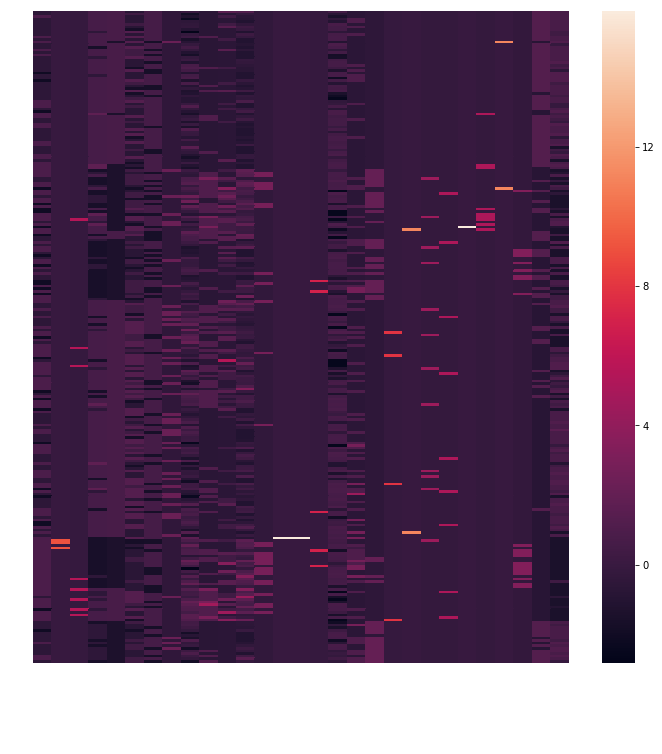

In [16]:
bic = SpectralBiclustering(
    n_clusters=10, random_state=SEED
)
bic.fit(X_std)

bic_fit = X_std[np.argsort(bic.row_labels_), :]
bic_fit = bic_fit[:, np.argsort(bic.column_labels_)]

plt.figure(figsize=(12, 12))
sns.heatmap(
    bic_fit, robust=True,
    xticklabels=features, yticklabels=patients,
    vmin=np.min(bic_fit), vmax=np.max(bic_fit)
)
plt.axis('off')

(0.0, 29.0, 254.0, 0.0)

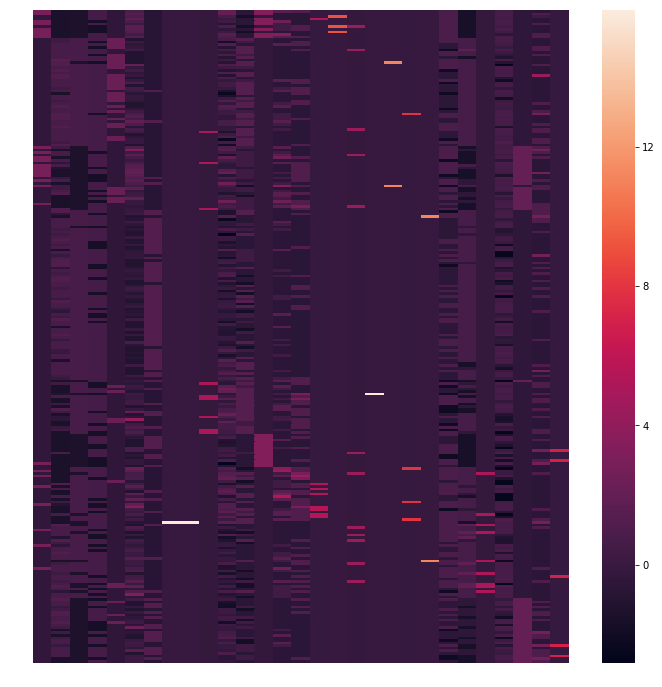

In [17]:
co = SpectralCoclustering(
    n_clusters=10, random_state=SEED
)
co.fit(X_std)

co_fit = X_std[np.argsort(co.row_labels_), :]
co_fit = co_fit[:, np.argsort(co.column_labels_)]

plt.figure(figsize=(12, 12))
sns.heatmap(
    co_fit, robust=True,
    vmin=np.min(co_fit), vmax=np.max(co_fit)
)
plt.axis('off')

## KMeans

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_std)
y_kmeans = kmeans.predict(X_std)

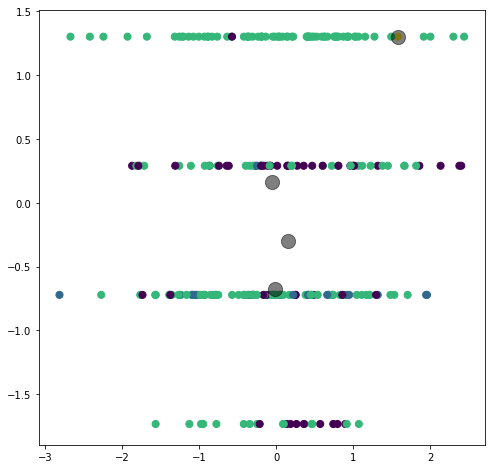

In [20]:
plt.figure(figsize=(8, 8))
plt.scatter(
    X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis'
)
centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5
);

## PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca_model = PCA(n_components=0.99, random_state=SEED)
pca_model.fit(X_std)

pca_model.explained_variance_ratio_.size

26